In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Data/349249426_72021_2512_airline_delay_causes.csv")

In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN


In [4]:
data = data[:10000]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
year                   10000 non-null int64
 month                 10000 non-null int64
carrier                10000 non-null object
carrier_name           10000 non-null object
airport                10000 non-null object
airport_name           10000 non-null object
arr_flights            9989 non-null float64
arr_del15              9985 non-null float64
carrier_ct             9989 non-null float64
 weather_ct            9989 non-null float64
nas_ct                 9989 non-null float64
security_ct            9989 non-null float64
late_aircraft_ct       9989 non-null float64
arr_cancelled          9989 non-null float64
arr_diverted           9989 non-null float64
 arr_delay             9989 non-null float64
 carrier_delay         9989 non-null float64
weather_delay          9989 non-null float64
nas_delay              9989 non-null float64
security_delay         9989 non-null fl

In [6]:
missing_data = data.isnull().sum()
print(missing_data)

year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               11
arr_del15                 15
carrier_ct                11
 weather_ct               11
nas_ct                    11
security_ct               11
late_aircraft_ct          11
arr_cancelled             11
arr_diverted              11
 arr_delay                11
 carrier_delay            11
weather_delay             11
nas_delay                 11
security_delay            11
late_aircraft_delay       11
Unnamed: 21            10000
dtype: int64


In [7]:
data = data.fillna(data.mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
year                   10000 non-null int64
 month                 10000 non-null int64
carrier                10000 non-null object
carrier_name           10000 non-null object
airport                10000 non-null object
airport_name           10000 non-null object
arr_flights            10000 non-null float64
arr_del15              10000 non-null float64
carrier_ct             10000 non-null float64
 weather_ct            10000 non-null float64
nas_ct                 10000 non-null float64
security_ct            10000 non-null float64
late_aircraft_ct       10000 non-null float64
arr_cancelled          10000 non-null float64
arr_diverted           10000 non-null float64
 arr_delay             10000 non-null float64
 carrier_delay         10000 non-null float64
weather_delay          10000 non-null float64
nas_delay              10000 non-null float64
security_delay         100

In [13]:
data = data.drop(['Unnamed: 21'], axis=1, errors='ignore')

In [15]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['airport']= label_encoder.fit_transform(data['airport'])
data['airport_name']= label_encoder.fit_transform(data['airport_name'])
data['carrier_name']= label_encoder.fit_transform(data['carrier_name'])
data['carrier']= label_encoder.fit_transform(data['carrier'])
data['airport'].unique()
data['airport_name'].unique()
data['carrier_name'].unique()
data['carrier'].unique()

array([10, 11, 12, 13, 14, 17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  8,  9,
       15, 16,  7])

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
import seaborn as sns

/home/user/test/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


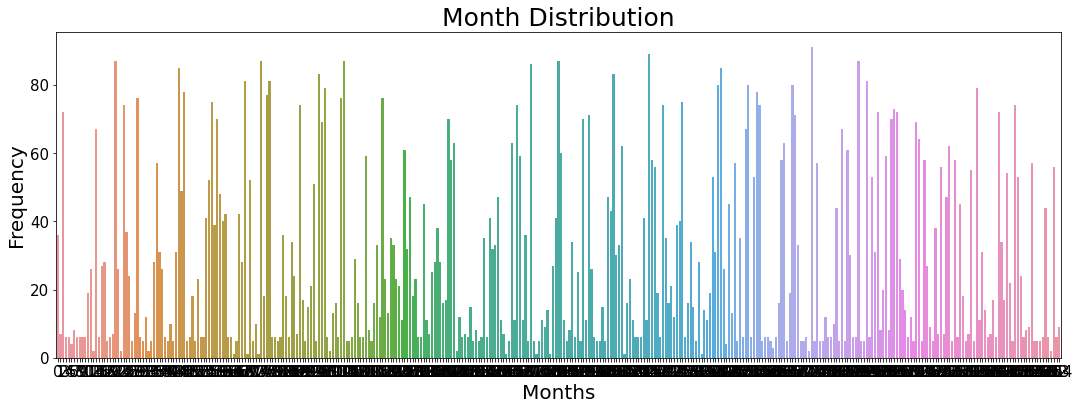

In [20]:
plt.figure(figsize = (18, 6))
sns.countplot(data['airport'])
plt.title('Airport Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Airport", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

# K-Means Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
X = data[['weather_delay', 'security_delay']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
X[:5]

array([[0.0012211 , 0.        ],
       [0.00151585, 0.        ],
       [0.0089688 , 0.        ],
       [0.00231589, 0.        ],
       [0.00113689, 0.        ]])

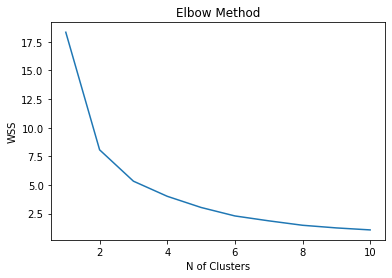

In [22]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    #print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

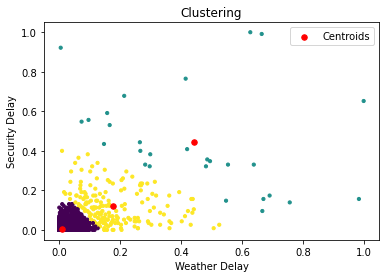

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Weather Delay')
plt.ylabel('Security Delay')
plt.legend()

plt.show()

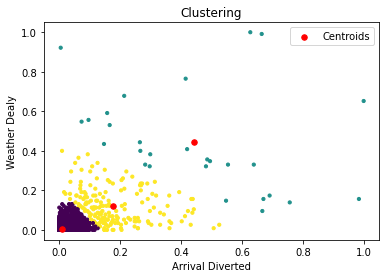

In [26]:
X = data[['weather_delay', 'arr_diverted']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Arrival Diverted')
plt.ylabel('Weather Dealy')
plt.legend()

plt.show()

# K Medoids Clustering

/home/user/test/lib/python3.6/site-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)


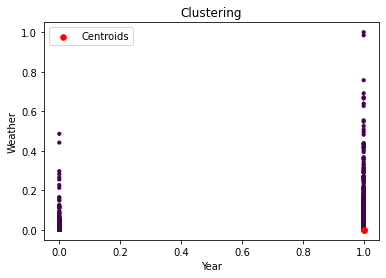

In [29]:
from sklearn_extra.cluster import KMedoids
X = data[['year', 'weather_delay']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
kmedoids.labels_
kmedoids.cluster_centers_
plt.scatter(X[:, 0], X[:,1], s = 10, c = kmedoids.labels_)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Year')
plt.ylabel('Weather')
plt.legend()

plt.show()

# Classification Data With ML & DL

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.read_csv("Data/flight_data.csv")
planes = pd.read_csv("Data/planes.csv")
airports = pd.read_csv("Data/airports.csv")
carriers = pd.read_csv("Data/carriers.csv")

In [33]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [34]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [35]:
# Dimension after dropping the rows containing NULL values
df.shape

(327346, 19)

In [37]:
df = df[:10000]

In [38]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [39]:
# Type casting
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

/home/user/test/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/test/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [40]:
df['carrier'].value_counts().to_frame()

,carrier
UA,1747
B6,1730
EV,1495
DL,1395
AA,1022
MQ,834
9E,545
US,542
WN,367
VX,129


In [41]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
carrier,,,,
HA,12.0,1301.0,124.666667,-5.0
YV,14.0,89.0,2.000000,-11.0
AS,23.0,29.0,2.043478,-12.0
F9,23.0,123.0,7.521739,-14.0
FL,122.0,23.0,-4.229508,-17.0
VX,129.0,38.0,1.271318,-14.0
WN,367.0,241.0,4.087193,-9.0
US,542.0,102.0,-2.867159,-14.0
9E,545.0,291.0,8.506422,-18.0


/home/user/test/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


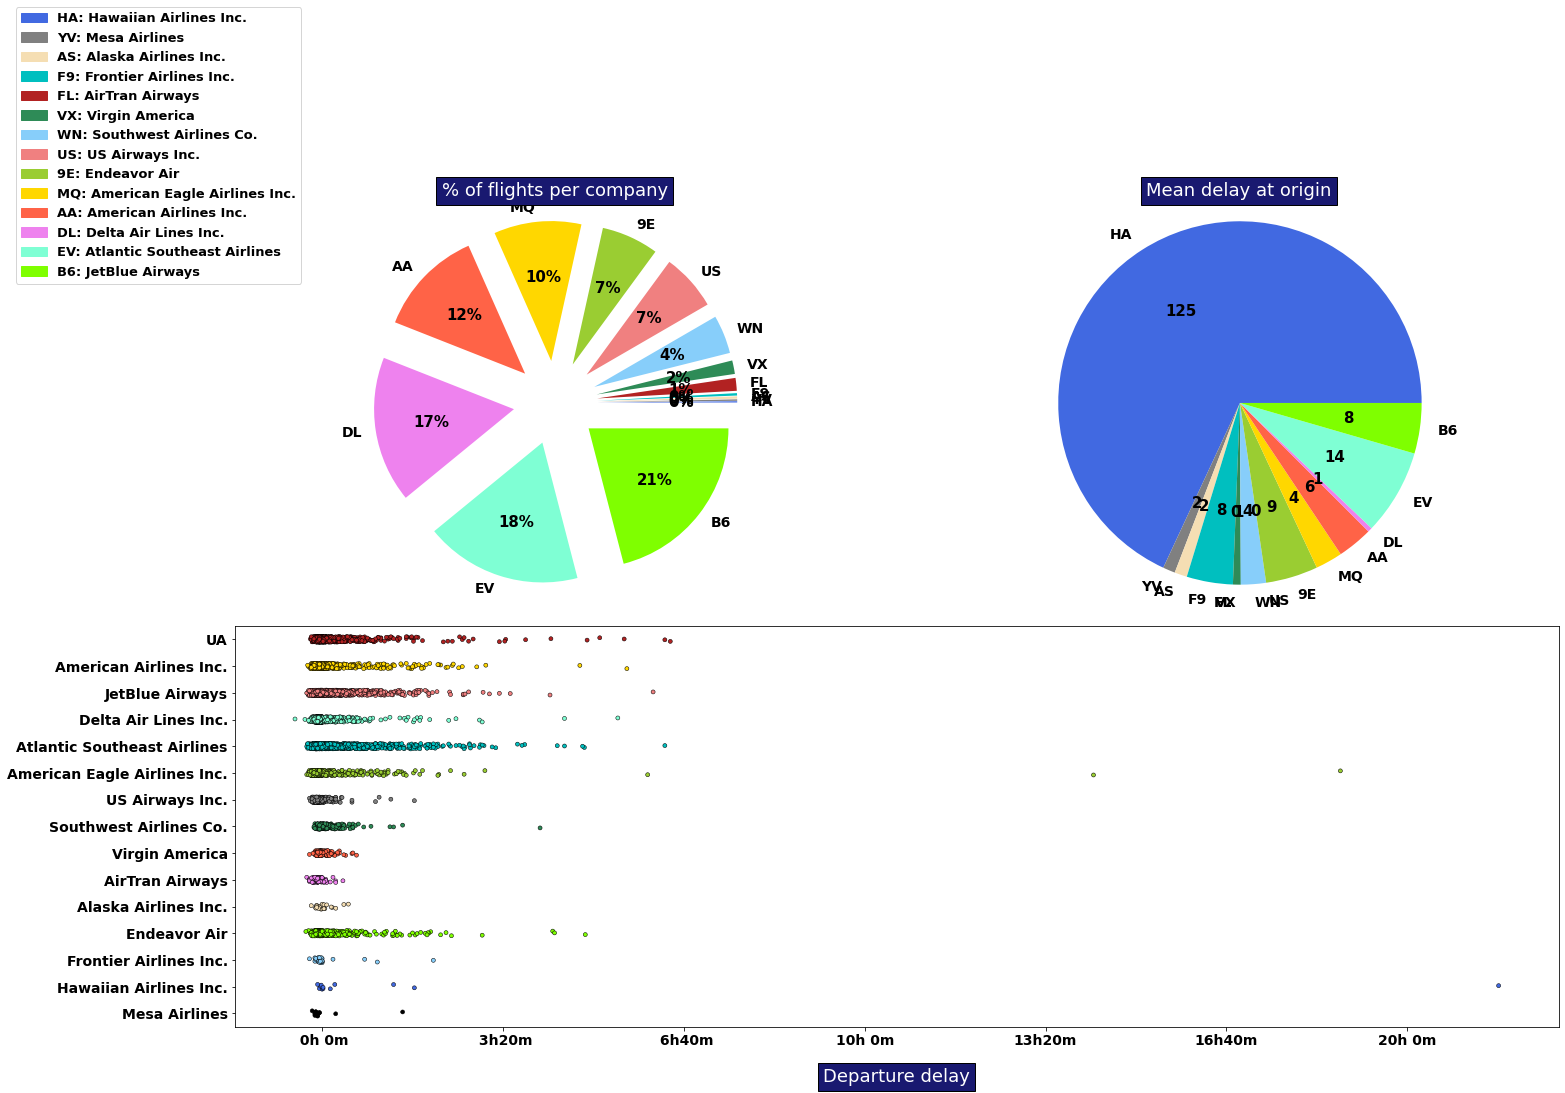

In [42]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

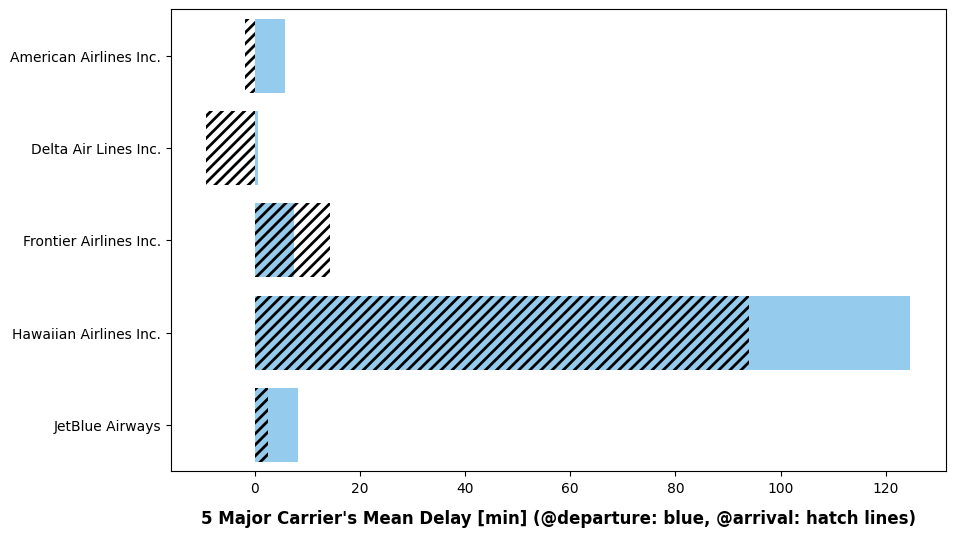

In [44]:
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)

In [45]:
df['origin'].value_counts().to_frame()

,origin
EWR,3652
JFK,3447
LGA,2901


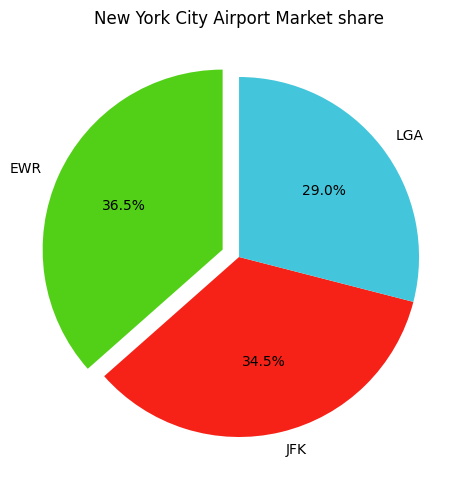

In [46]:
plt.pie(df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB'])

plt.tight_layout()
plt.title("New York City Airport Market share")
plt.show()

# Modelling

In [47]:
def map_labels(delays):
    if delays > 15:
        return 1
    else:
        return 0

df['delayed'] = ((df['dep_delay'].map(map_labels) + df['arr_delay'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)

0    0.7927
1    0.2073
Name: delayed, dtype: float64

In [48]:
# feature omission
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [49]:
df['delayed'].value_counts().to_frame()

,delayed
0,7927
1,2073


In [50]:
df['dest'].value_counts().to_frame()

,dest
ATL,519
ORD,478
MCO,449
FLL,439
LAX,436
BOS,414
CLT,393
MIA,366
SFO,339
DTW,288


In [51]:
saving_data = df.to_csv("Data/Processed_data.csv", index = False)

# Deployment of Machine Learning Classifier

In [52]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('Data/Processed_data.csv')

In [55]:
columns= ['carrier','dest', 'origin']
le=LabelEncoder()
for i in columns:
     data[i]=le.fit_transform(data[i])

In [56]:
data['carrier'].unique()
data['origin'].unique()
data['dest'].unique()

array([38, 50,  8,  1, 60, 30, 37, 46, 62, 90, 43, 80, 25,  7, 42, 53, 27,
       74, 82, 65, 12, 18, 10, 24, 85, 54, 83, 93, 51, 79, 73, 89, 86, 71,
       19, 41, 16, 48, 66, 75, 23, 17, 87, 56, 40, 47, 35,  6,  2,  9, 64,
       88, 28,  3, 70, 39, 77, 15, 36, 44, 22,  0,  4, 49, 52, 32, 21, 11,
       72, 33, 31, 45, 61, 76, 78, 63, 81, 59, 20, 57, 84, 92, 69, 26, 67,
       91,  5, 58, 14, 34, 13, 55, 29, 68])

In [57]:
X = data.iloc[:, 0:6].values # from column(years) to column(distance)
X[0:5]

array([[2013,    1,    1,   10,    0,   38],
       [2013,    1,    1,   10,    2,   38],
       [2013,    1,    1,    1,    1,   50],
       [2013,    1,    1,    3,    1,    8],
       [2013,    1,    1,    4,    2,    1]])

In [90]:
y = data['delayed']
y

0       0
1       1
2       1
3       0
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      1
38      0
39      0
40      0
41      1
42      1
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      1
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      1
71      0
72      0
73      1
74      0
75      0
76      0
77      1
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      1
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      1
97      0
98      0
99      0


In [59]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.        ,  0.        , -1.5881878 ,  1.12469953, -1.14749742,
        -0.17934525],
       [ 0.        ,  0.        , -1.5881878 ,  1.12469953,  1.33384634,
        -0.17934525],
       [ 0.        ,  0.        , -1.5881878 , -1.27702205,  0.09317446,
         0.28574162],
       [ 0.        ,  0.        , -1.5881878 , -0.74330615,  0.09317446,
        -1.34206244],
       [ 0.        ,  0.        , -1.5881878 , -0.47644819,  1.33384634,
        -1.61336312]])

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 6) (8000,)
Test set: (2000, 6) (2000,)


# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_jobs=-1,random_state=1000)
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for RF: 
[[1375  206]
 [ 312  107]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1581
           1       0.34      0.26      0.29       419

    accuracy                           0.74      2000
   macro avg       0.58      0.56      0.57      2000
weighted avg       0.72      0.74      0.73      2000



In [62]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
RF_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",RF_ACC)
from sklearn import metrics
RF_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",RF_sensitivity)
RF_specificity = (TN / (TN + FP))

print("Specificity: ",RF_specificity)

0.2095
Accuracy:  0.741
Sensitivity:  0.9278002699055331
Specificity:  0.39768339768339767


# Decision Tree Classifier

In [63]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
DT_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",DT_ACC)
from sklearn import metrics
DT_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",DT_sensitivity)
DT_specificity = (TN / (TN + FP))

print("Specificity: ",DT_specificity)

*Confusion Matrix for DT: 
[[1395  186]
 [ 326   93]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1581
           1       0.33      0.22      0.27       419

    accuracy                           0.74      2000
   macro avg       0.57      0.55      0.56      2000
weighted avg       0.71      0.74      0.72      2000

0.2095
Accuracy:  0.744
Sensitivity:  0.9375
Specificity:  0.36328125


# MLP Classifier

In [64]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
MLP_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",MLP_ACC)
from sklearn import metrics
MLP_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",MLP_sensitivity)
MLP_specificity = (TN / (TN + FP))

print("Specificity: ",MLP_specificity)

*Confusion Matrix for MLP: 
[[1567   14]
 [ 394   25]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1581
           1       0.64      0.06      0.11       419

    accuracy                           0.80      2000
   macro avg       0.72      0.53      0.50      2000
weighted avg       0.77      0.80      0.72      2000

0.2095
Accuracy:  0.796
Sensitivity:  0.9842964824120602
Specificity:  0.03431372549019608


/home/user/test/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Bernoulli Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
print("*Confusion Matrix for BNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for BNB: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
BNB_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",BNB_ACC)
from sklearn import metrics
BNB_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",BNB_sensitivity)
BNB_specificity = (TN / (TN + FP))

print("Specificity: ",BNB_specificity)

*Confusion Matrix for BNB: 
[[1581    0]
 [ 419    0]]
*Classification Report for BNB: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1581
           1       0.00      0.00      0.00       419

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000

0.2095
Accuracy:  0.7905
Sensitivity:  1.0
Specificity:  0.0


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighbors Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
KNN_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",KNN_ACC)
from sklearn import metrics
KNN_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",KNN_sensitivity)
KNN_specificity = (TN / (TN + FP))

print("Specificity: ",KNN_specificity)

*Confusion Matrix for KNN: 
[[1428  153]
 [ 319  100]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1581
           1       0.40      0.24      0.30       419

    accuracy                           0.76      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.73      0.76      0.74      2000

0.2095
Accuracy:  0.764
Sensitivity:  0.9345549738219895
Specificity:  0.3241525423728814


# Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
GNB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
GNB_ACC = accuracy_score(y_test, predictions)
print("Accuracy: ",GNB_ACC)
from sklearn import metrics
GNB_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",GNB_sensitivity)
GNB_specificity = (TN / (TN + FP))

print("Specificity: ",GNB_specificity)

*Confusion Matrix for GNB: 
[[1575    6]
 [ 406   13]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.88      1581
           1       0.68      0.03      0.06       419

    accuracy                           0.79      2000
   macro avg       0.74      0.51      0.47      2000
weighted avg       0.77      0.79      0.71      2000

0.2095
Accuracy:  0.794
Sensitivity:  0.9918136020151134
Specificity:  0.014563106796116505


# Voting Classifier

In [68]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[1410  171]
 [ 329   90]]


In [69]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
Vot_acc = accuracy_score(y_test, predictions) * 100
print(Vot_acc)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.2095
75.0
94.0
34.2


# Support Vector Machine

In [70]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto')
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for SVM: 
[[1581    0]
 [ 419    0]]


In [71]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
SVM_acc = accuracy_score(y_test, predictions) * 100
print(SVM_acc)
from sklearn import metrics
svm_sensitivity = ((TP / float(FN + TP))) * 100

print(svm_sensitivity)
svm_specificity = ((TN / (TN + FP))) * 100

print(svm_specificity)

0.2095
79.05
100.0
0.0


# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
LR_acc = accuracy_score(y_test, predictions) * 100
print(LR_acc)
from sklearn import metrics
LR_sensitivity = ((TP / float(FN + TP))) * 100

print(LR_sensitivity)
LR_specificity = ((TN / (TN + FP))) * 100

print(LR_specificity)

*Confusion Matrix for LR: 
[[1581    0]
 [ 419    0]]
0.2095
79.05
100.0
0.0


# Ridge Classification

In [79]:
from sklearn.linear_model import RidgeClassifier
rid = RidgeClassifier()
rid.fit(X_train, y_train)
predictions = rid.predict(X_test)

In [80]:
print("*Confusion Matrix for rid: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
rid_acc = accuracy_score(y_test, predictions) * 100
print(rid_acc)
from sklearn import metrics
rid_sensitivity = ((TP / float(FN + TP))) * 100

print(LR_sensitivity)
rid_specificity = ((TN / (TN + FP))) * 100

print(rid_specificity)

*Confusion Matrix for rid: 
[[1581    0]
 [ 419    0]]
0.2095
79.05
100.0
0.0


# Neural Network

In [100]:
X_train.shape

(8000, 6)

In [102]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [101]:
model = Sequential()
model.add(Dense(12,input_shape=(6,),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"]) 

In [105]:

run_hist_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
250/250 [==============================] - 2s 8ms/step - loss: 0.7205 - accuracy: 0.4678 - val_loss: 0.6399 - val_accuracy: 0.7385
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6005 - accuracy: 0.7805 - val_loss: 0.5742 - val_accuracy: 0.7905
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5532 - accuracy: 0.7933 - val_loss: 0.5407 - val_accuracy: 0.7905
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.5290 - accuracy: 0.7933 - val_loss: 0.5244 - val_accuracy: 0.7905
Epoch 5/20
250/250 [==============================] - 2s 7ms/step - loss: 0.5176 - accuracy: 0.7933 - val_loss: 0.5168 - val_accuracy: 0.7905
Epoch 6/20
250/250 [==============================] - 2s 7ms/step - loss: 0.5122 - accuracy: 0.7933 - val_loss: 0.5130 - val_accuracy: 0.7905
Epoch 7/20
250/250 [==============================] - 1s 5ms/step - loss: 0.5093 - accuracy: 0.7933 - val_loss: 0.5106 - val_accuracy: 0.7905
Epoch 

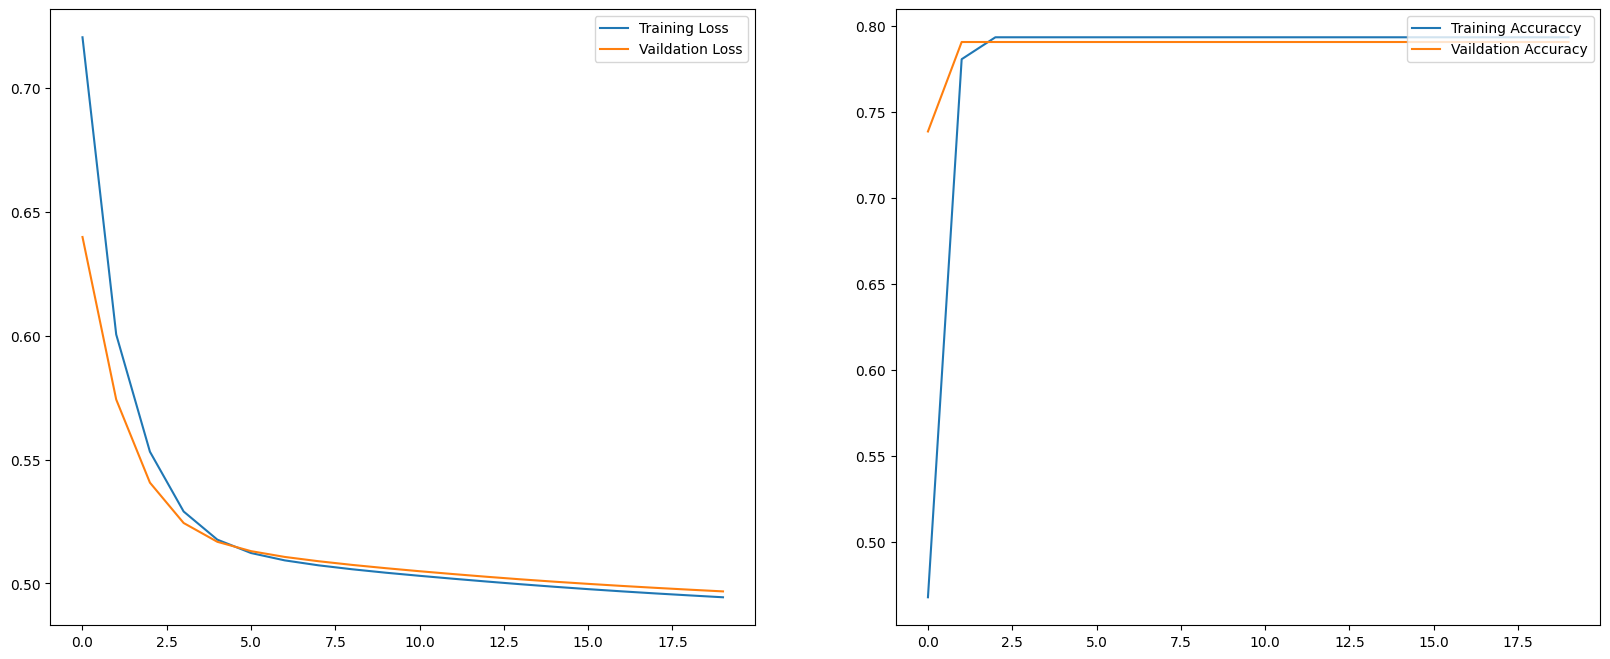

In [106]:
import matplotlib.pyplot as plt

x = run_hist_1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(x.history['loss'],label="Training Loss")
plt.plot(x.history['val_loss'],label="Vaildation Loss")
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(x.history['accuracy'] , label = "Training Accuraccy" )
plt.plot(x.history['val_accuracy'] , label = "Vaildation Accuracy" )
plt.legend(loc='upper right')
plt.show()

In [107]:
y_pred_class_nn_1 = model.predict_classes(X_test)
y_pred_prob_nn_1 = model.predict(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [108]:
nn_acc = accuracy_score(y_test,y_pred_class_nn_1)

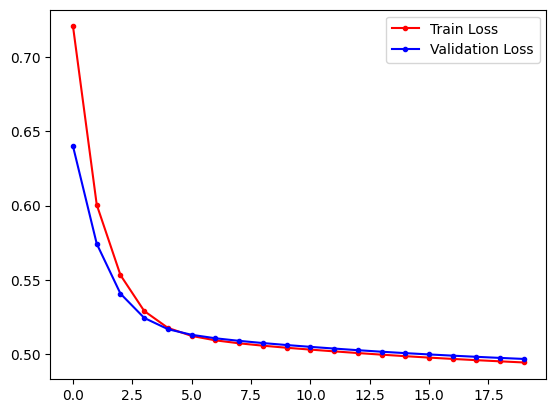

In [109]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# Accuracy Comparsion

In [117]:
score = [RF_ACC*100,DT_ACC*100,MLP_ACC*100,BNB_ACC*100,KNN_ACC*100,GNB_ACC*100,Vot_acc,SVM_acc,LR_acc,rid_acc,nn_acc*100]

In [118]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','MLP','BNB','KNN','GNB','Voting Classifier','Support Vector Machine','Logistic Regression','Ridge Classification','Neural Network')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[ 0  1  2  3  4  5  6  7  8  9 10]
[74.1, 74.4, 79.60000000000001, 79.05, 76.4, 79.4, 75.0, 79.05, 79.05, 79.05, 79.05]


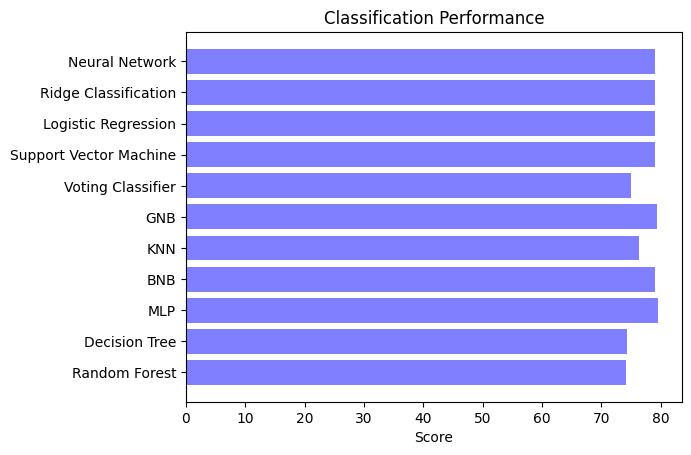

In [119]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()